<a href="https://colab.research.google.com/github/gabrielawad/ppi-SI/blob/main/ppi_SI_06_GeoPandas_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «*Quien no se mueve, no siente las cadenas*».
### [Rosa de Luxemburgo](https://es.wikipedia.org/wiki/Rosa_Luxemburgo)

# ppi_SI_06_GeoPandas_SciPy

Actividad individual.

Utilice el dataset seleccionado en **SI02 Repositorio datos geoespaciales de Kaggle**.

Diligencie las casillas indicadas siguiendo las normas de estilo del PEP8.

# Instalar GeoPandas

GeoPandas no es una librería nativa de Python por lo que **requiere ser instalada antes de ser invocada**.


In [14]:
# Instalar GeoPandas
!pip install geopandas

# Instalar spcipy
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preparación del ejercicio

*   Importe las librerías requeridas
*   Lea el dataset a utilizar desde una url

Sugerencia: suba el dataset a Googledrive y luego publíquelo como página web. El siguiente enlace le indica cómo hacerlo: [Cómo publicar archivos de Documentos, Hojas de cálculo, Presentaciones y Formularios de Google](https://support.google.com/docs/answer/183965?hl=es-419&co=GENIE.Platform%3DDesktop).

Nota: si lo desea puede utilizar otro método para obtener la url del dataset.



In [15]:
# Escriba aquí su código

# Importar las librerías necesarias
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.spatial import Delaunay, ConvexHull, convex_hull_plot_2d, distance
from scipy.cluster.vq import kmeans2, whiten

# Conocer la versiones de las librerías instaladas

# Versión de pandas
print(pd.__version__)

# Versión de geopandas
print(gpd.__version__)

# Versión de matplotlib
print(mpl.__version__)

# Versión de spcipy
print(sc.__version__)

# Versión de numpy
print(np.__version__)

# Guardar en la variable 'ruta' la url del dataset
ruta = "https://raw.githubusercontent.com/danielcgiraldo/SI06/main/co_properties_summary.csv"

"""
El archivo original era demasiado pesado para ser procesado 
en Excel, Google Sheets o incluso para subirlo a GitHub 
por el mismo motivo.

Por esta razón, se implementó el siguiente código 
con el fin de filtrar la mayoría de las columnas y
conservar únicamente las relacionadas con
geolocalización:

# Importar las librerías necesarias
import pandas as pd

# Cargar el dataset a partir de la ruta establecida
df = pd.read_csv('co_properties.csv')

# Mantener las columnas relacionadas con ubicación
df = df[['id', 'lon', 'lat', 'l2', 'l3']]

# Exportar nuevo .csv
df.to_csv('co_properties_summary.csv', index=False, decimal='.')
"""

# Cargar el dataset a partir de la ruta establecida
df = pd.read_csv(ruta, decimal=',')

# Eliminar filas con lon o lat Nan
df.dropna(subset=['lon', 'lat'], inplace=True)

# Convertir Pandas DataSet to GeoPandas DataSet
gdf = gpd.GeoDataFrame(
    df[['id', 'l2', 'l3']], geometry=gpd.points_from_xy(df.lon, df.lat)
)

# Verificar la lectura del dataset
gdf.head()


1.5.3
0.13.0
3.7.1
1.10.1
1.22.4


,id,l2,l3,geometry
0,KsjahK62rxcYKXXQjOdkqw==,Valle del Cauca,NaN,POINT (-76.50600 3.92100)
1,Y+gsBZYq1zu5NoR3V5oUGA==,Valle del Cauca,Cali,POINT (-76.54181 3.35770)
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Valle del Cauca,Cali,POINT (-76.54181 3.35770)
3,ieuFnkFx/yHDD66iMV14Gw==,Valle del Cauca,Cali,POINT (-76.53800 3.36400)
4,g4u5JM+hAHEk8SukRSjMzg==,Valle del Cauca,Cali,POINT (-76.51700 3.39100)


## '00.  Mostrar datos

Ubique en un mapa las coordenadas de los puntos contenidos en el dataset.

<ipython-input-16-be7d42d5f565>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mapamundi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


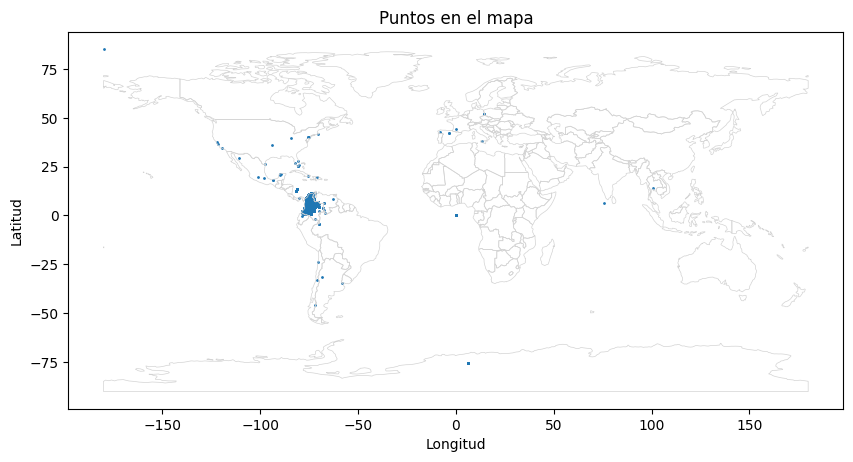

In [16]:
# Escriba aquí su código

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el fondo del mapa en color gris claro
mapamundi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mapamundi.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

# Graficar las geometrías de los puntos sobre el mapa
gdf.plot(ax=ax, markersize=1)

# Establecer etiquetas de los ejes y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Puntos en el mapa')

# Mostrar el gráfico
plt.show()


## '01. Seleccionar datos

Ubique en un mapa los cinco puntos más alejados del centro del dataset.

<ipython-input-17-4cb84d1b2d1b>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mapamundi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


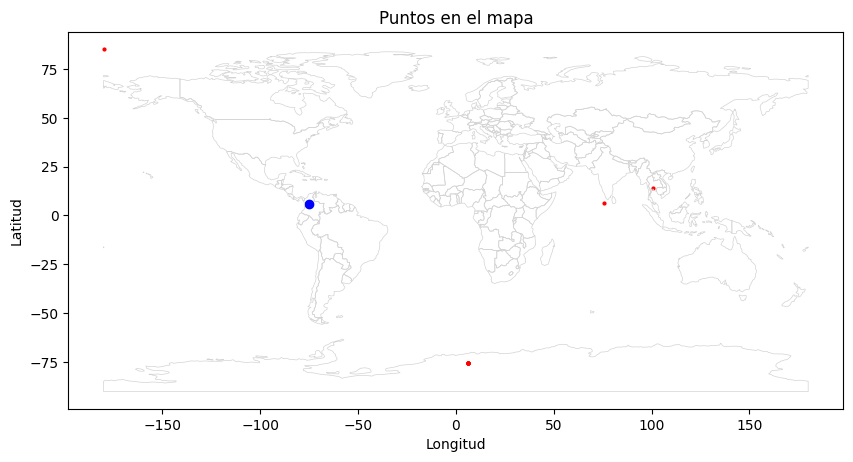

In [17]:
# Calcular el centroide del dataset

centro = gdf.dissolve().centroid

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el fondo del mapa en color gris claro
mapamundi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mapamundi.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

# Graficar el centroide en azul
centro.plot(ax=ax, color="blue")

# Ordenar los puntos por distancia al centroide y graficar
# los 5 puntos más alejados en rojo
gdf['distance'] = gdf.distance(centro[0])
gdf = gdf.sort_values('distance', ascending=True)
gdf.tail(10).plot(ax=ax, color='red', markersize=4)

# Establecer etiquetas de los ejes y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Puntos en el mapa')

# Mostrar el gráfico
plt.show()


## '02. Distancia euclidiana

Calcule la distancia euclideana para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [18]:
# Escriba su código aquí

# Considerando que la cantidad de filas es muy grande,
# vamos a obtener una muestra aleatoria de 100 puntos
gdf_sample = gdf.sample(100)

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf_sample.geometry.x.to_numpy()
y_coords = gdf_sample.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Calcula la distancia euclidiana entre cada punto
distances = distance.cdist(coords, coords)

# Calcula la distancia promedio, mínima y máxima
distancia_mean = np.mean(distances[distances > 0])
distancia_min = np.min(distances[distances > 0])
distancia_max = np.max(distances)

print("Distancia promedio:", distancia_mean)
print("Distancia mínima:", distancia_min)
print("Distancia máxima:", distancia_max)

# Encuentra los índices donde se encuentra la distancia mínima
indices_min = np.where(distances == distancia_min)[0]
# Encuentra las coordenadas de los puntos con distancia mínima
x_coords_min = x_coords[indices_min]
y_coords_min = y_coords[indices_min]

# Encuentra los índices donde se encuentra la distancia máxima
indices_max = np.where(distances == distancia_max)[0]
# Encuentra las coordenadas de los puntos con distancia máxima
x_coords_max = x_coords[indices_max]
y_coords_max = y_coords[indices_max]

print(f"Puntos con distancia mínima: P({x_coords_min[0]}, "
      f"{y_coords_min[0]}) y P({x_coords_min[1]}, {y_coords_min[1]})")
print(f"Puntos con distancia máxima: P({x_coords_max[0]}, "
      f"{y_coords_max[0]}) y P({x_coords_max[1]}, {y_coords_max[1]})")


Distancia promedio: 2.389142973903744
Distancia mínima: 0.0005641945126500163
Distancia máxima: 7.948761734414708
Puntos con distancia mínima: P(-74.834, 10.981) y P(-74.8335886, 10.98138609)
Puntos con distancia máxima: P(-74.815, 11.016) y P(-76.5380525, 3.2562382)


## '03. Distancia de Manhattan

Calcule la distancia de Manhattan para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [19]:
# Escriba su código aquí

# Considerando que la cantidad de filas es muy grande,
# vamos a obtener una muestra aleatoria de 100 puntos
gdf_sample = gdf.sample(100)

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf_sample.geometry.x.to_numpy()
y_coords = gdf_sample.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Inicializa una matriz para almacenar las distancias
distances = np.zeros((len(coords), len(coords)))

# Calcula la distancia de Manhattan entre cada par de puntos
for i in range(len(coords)):
    for j in range(i + 1, len(coords)):
        distance_ij = distance.cityblock(coords[i], coords[j])
        distances[i, j] = distance_ij
        distances[j, i] = distance_ij

# Calcula la distancia promedio, mínima y máxima
distancia_mean = np.mean(distances[distances > 0])
distancia_min = np.min(distances[distances > 0])
distancia_max = np.max(distances)

print("Distancia promedio:", distancia_mean)
print("Distancia mínima:", distancia_min)
print("Distancia máxima:", distancia_max)

# Encuentra los índices donde se encuentra la distancia mínima
indices_min = np.where(distances == distancia_min)[0]
# Encuentra las coordenadas de los puntos con distancia mínima
x_coords_min = x_coords[indices_min]
y_coords_min = y_coords[indices_min]

# Encuentra los índices donde se encuentra la distancia máxima
indices_max = np.where(distances == distancia_max)[0]
# Encuentra las coordenadas de los puntos con distancia máxima
x_coords_max = x_coords[indices_max]
y_coords_max = y_coords[indices_max]

print(f"Puntos con distancia mínima: P({x_coords_min[0]}, "
      f"{y_coords_min[0]}) y P({x_coords_min[1]}, {y_coords_min[1]})")
print(f"Puntos con distancia máxima: P({x_coords_max[0]}, "
      f"{y_coords_max[0]}) y P({x_coords_max[1]}, {y_coords_max[1]})")


Distancia promedio: 3.084096802112504
Distancia mínima: 0.0008093299999991643
Distancia máxima: 12.076109299999993
Puntos con distancia mínima: P(-75.48893791, 5.05196688) y P(-75.4884607, 5.052299)
Puntos con distancia máxima: P(-74.798, 11.009) y P(-77.2549246, 1.3898153)


## '04. Distancia de coseno

Calcule la distancia de coseno para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [20]:
# Escriba su código aquí

# Considerando que la cantidad de filas es muy grande,
# vamos a obtener una muestra aleatoria de 100 puntos
gdf_sample = gdf.sample(100)

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf_sample.geometry.x.to_numpy()
y_coords = gdf_sample.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Inicializa una matriz para almacenar las distancias
distances = np.zeros((len(coords), len(coords)))

# Calcula la distancia de Coseno entre cada par de puntos
for i in range(len(coords)):
    for j in range(i + 1, len(coords)):
        distance_ij = distance.cosine(coords[i], coords[j])
        distances[i, j] = distance_ij
        distances[j, i] = distance_ij

# Calcula la distancia promedio, mínima y máxima
distancia_mean = np.mean(distances[distances > 0])
distancia_min = np.min(distances[distances > 0])
distancia_max = np.max(distances)

print("Distancia promedio:", distancia_mean)
print("Distancia mínima:", distancia_min)
print("Distancia máxima:", distancia_max)

# Encuentra los índices donde se encuentra la distancia mínima
indices_min = np.where(distances == distancia_min)[0]
# Encuentra las coordenadas de los puntos con distancia mínima
x_coords_min = x_coords[indices_min]
y_coords_min = y_coords[indices_min]

# Encuentra los índices donde se encuentra la distancia máxima
indices_max = np.where(distances == distancia_max)[0]
# Encuentra las coordenadas de los puntos con distancia máxima
x_coords_max = x_coords[indices_max]
y_coords_max = y_coords[indices_max]

print(f"Puntos con distancia mínima: P({x_coords_min[0]}, "
      f"{y_coords_min[0]}) y P({x_coords_min[1]}, {y_coords_min[1]})")
print(f"Puntos con distancia máxima: P({x_coords_max[0]}, "
      f"{y_coords_max[0]}) y P({x_coords_max[1]}, {y_coords_max[1]})")


Distancia promedio: 0.0007839137583325877
Distancia mínima: 2.319033853837027e-12
Distancia máxima: 0.005366593483287385
Puntos con distancia mínima: P(-75.574, 6.159) y P(-75.3739356995, 6.1428589098)
Puntos con distancia máxima: P(-76.542, 3.254) y P(-74.886, 11.022)


## '05. Triangulación de Delaunay

Aplique la [Triangulación de Delaunay](https://en.wikipedia.org/wiki/Delaunay_triangulation) para los puntos que se encuentran en el dataset.

<ipython-input-21-7ebc580db9da>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


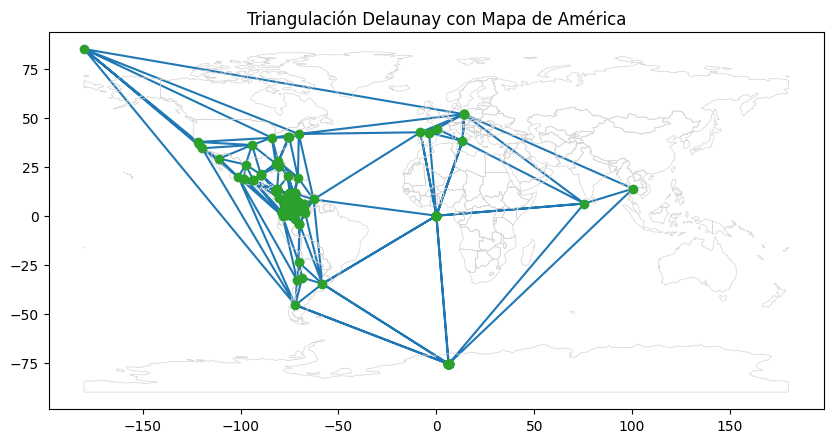

In [21]:
# Escriba su código aquí

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf.geometry.x.to_numpy()
y_coords = gdf.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Triangulación Delaunay de las coordenadas
tri = Delaunay(coords)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Cargar el mapa y gráficar solo Colombia.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

# Graficar los triángulos de la triangulación Delaunay
plt.triplot(coords[:, 0], coords[:, 1], tri.simplices)

# Graficar los puntos
plt.plot(coords[:, 0], coords[:, 1], 'o')

# Establecer título
plt.title('Triangulación Delaunay con Mapa de América')

# Mostrar gráfico
plt.show()


## '06. Casco convexo

Calcule y muestre el casco convexo para los puntos que se encuentran en el dataset.

<ipython-input-22-a2780f3e7da8>:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


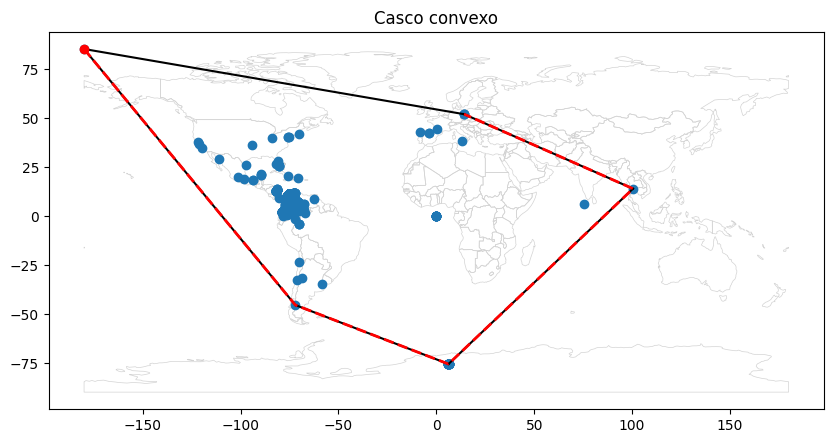

In [22]:
# Escriba su código aquí

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf.geometry.x.to_numpy()
y_coords = gdf.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Casco convexo de las coordenadas
hull = ConvexHull(coords)

# Gráfica

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Cargar el mapa y gráficar solo Colombia.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

# Coordenadas
plt.plot(coords[:, 0], coords[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(coords[simplex, 0], coords[simplex, 1], 'k-')

# Casco
plt.plot(coords[hull.vertices, 0], coords[hull.vertices, 1], 'r--', lw=2)
plt.plot(coords[hull.vertices[0], 0], coords[hull.vertices[0], 1], 'ro')

# Establecer título
plt.title('Casco convexo')

plt.show()


## '07. Sumatoria de mínimos cuadrados

Calcule la sumatoria de mínimos cuadrados para los puntos que se encuentran en el dataset.

In [23]:
# Escriba su código aquí

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf.geometry.x.to_numpy()
y_coords = gdf.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Calcula la suma de mínimos cuadrados
sum_min_squared = np.sum(np.linalg.norm(coords, axis=1) ** 2)

print("Suma de mínimos cuadrados:", sum_min_squared)


Suma de mínimos cuadrados: 4182486362.791476


## '08. Cluster

Calcule el agrupamiento (cluster) de nivel tres para los puntos que se encuentran en el dataset.

<ipython-input-24-c6774feaab13>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


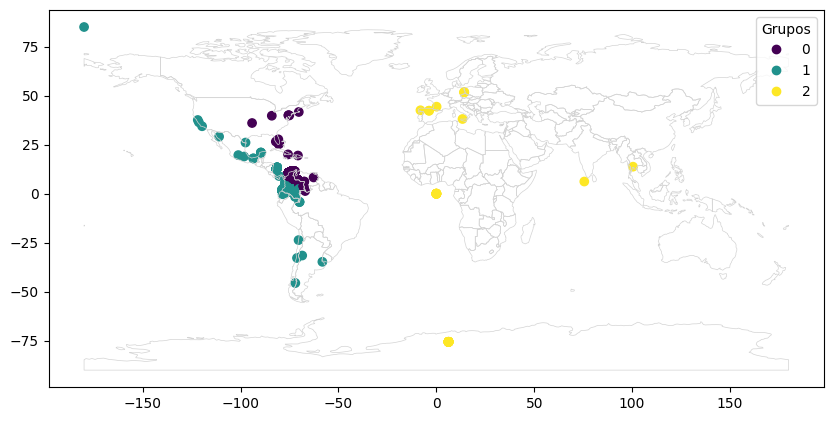

In [24]:
# Escriba su código aquí

# Convierte la columna geometry en un arreglo 2D
# Extrae las coordenadas x e y en dos arreglos separados
x_coords = gdf.geometry.x.to_numpy()
y_coords = gdf.geometry.y.to_numpy()

# Crea un arreglo 2D con las coordenadas x e y
coords = np.column_stack((x_coords, y_coords))

# Agrupar las coordenadas en 3 niveles
centroids, labels = kmeans2(whiten(coords), 3)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Cargar el mapa y gráficar solo Colombia.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

# Graficar los puntos de acuerdo a los grupos obtenidos
scatter = ax.scatter(coords[:, 0], coords[:, 1], c=labels)

# Agregar una leyenda para los grupos
legend = ax.legend(*scatter.legend_elements(), title='Grupos')

# Mostrar el gráfico
plt.show()
